In [21]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../distvis")
from plots import *
from plots import *
import plotly.io as pio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We can use the following lines of codes and set **interactive_plots=False** to make static plots that can be showed on Github

In [22]:
interactive_plots = False
if interactive_plots is False:
    pio.renderers.default = "svg"
else:
    pio.renderers.default = "plotly_mimetype+notebook"

# Load data and preprocess

In [23]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

value_maps = {
    'stroke': {
        1: 'had stroke',
        0: "didn't have stroke"
    }
    ,
    'ever_married': {
        'Yes': 'ever married',
        'No': 'never married'
    }
}

for col, mapping in value_maps.items():
    data[col] = data[col].map(mapping)

In [24]:
numerical_feats = [
    'age',
    'avg_glucose_level', 
    'bmi'     
]

categorical_feats = [
    'gender',
    'hypertension', 
    'heart_disease', 
    'ever_married',
    'work_type', 
    'Residence_type',
    'smoking_status'
]

target = 'stroke'

# Compare numerical features
Partition by target

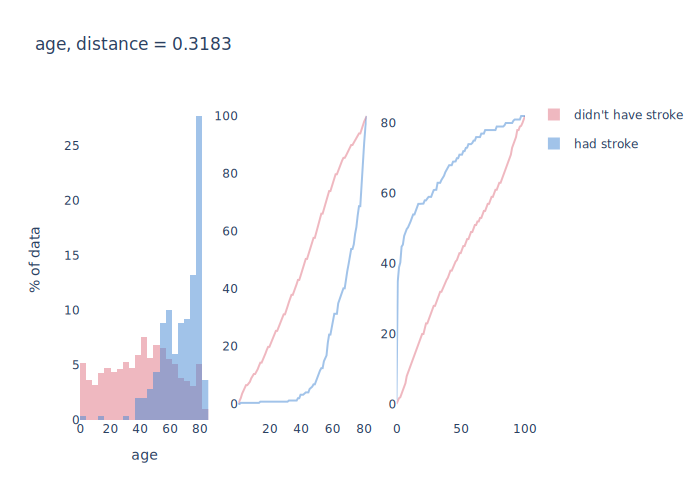

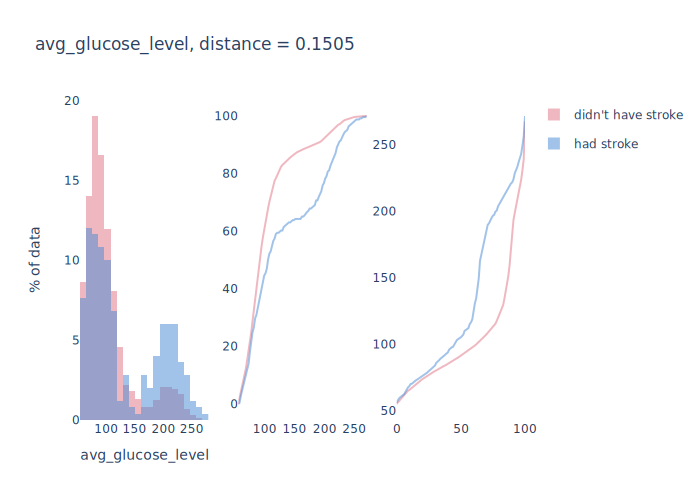

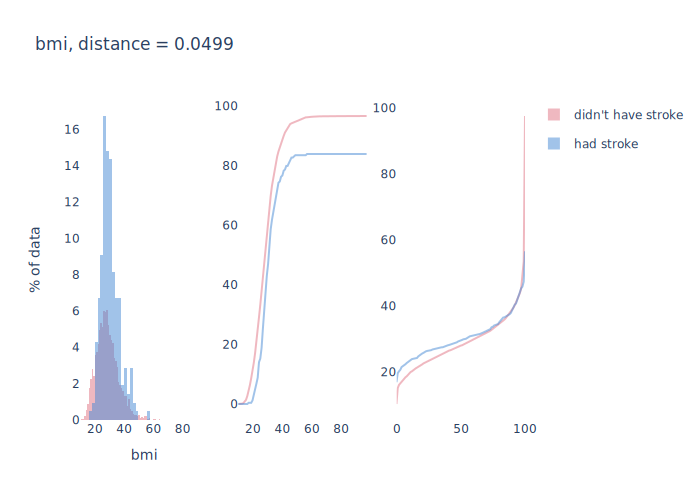

In [25]:
fig_dict, distances = compare_numerical_features(data, numerical_feats, groupby=target, nbins=20, 
                                                 plot_cdf=True, plot_inv_cdf=True)
for feat, fig in fig_dict.items():
    fig.show()

In [26]:
round(distances, 2)

,distance
feature,
age,0.32
avg_glucose_level,0.15
bmi,0.05


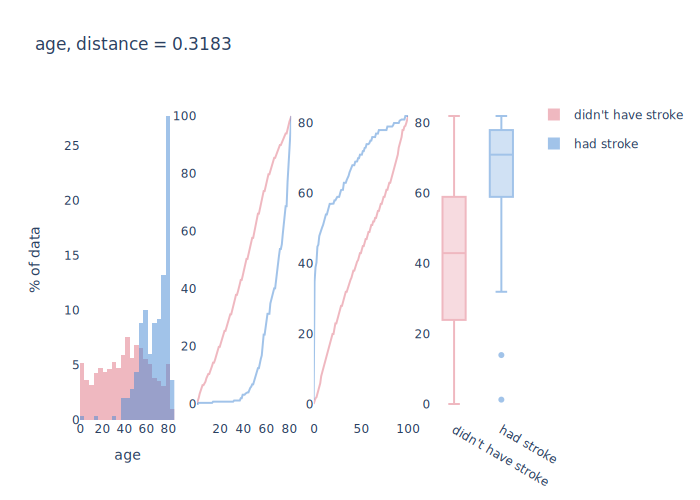

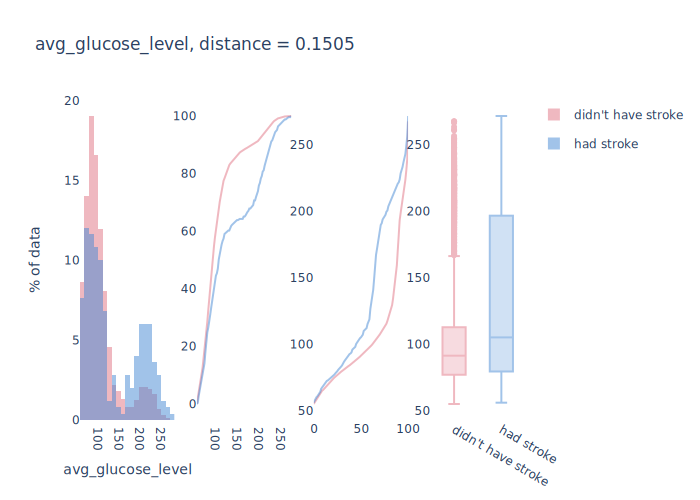

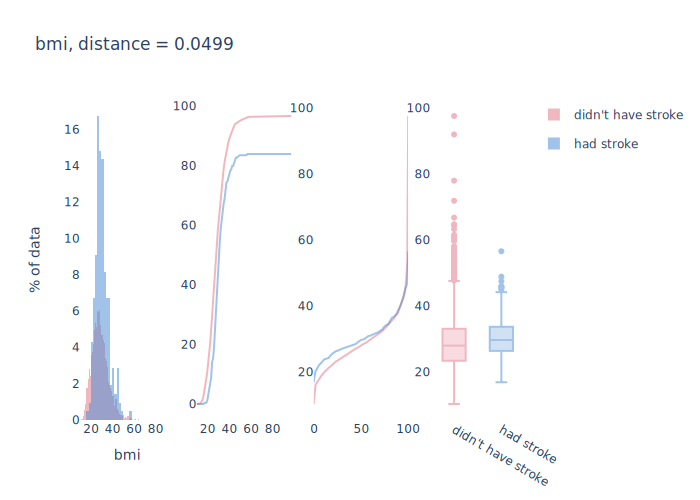

In [27]:
fig_dict, distances = compare_numerical_features(data, numerical_feats, groupby=target, nbins=20, 
                                                 plot_cdf=True, plot_inv_cdf=True, plot_box = True)
for feat, fig in fig_dict.items():
    fig.show()

# Compare categorical features
Partitio by target

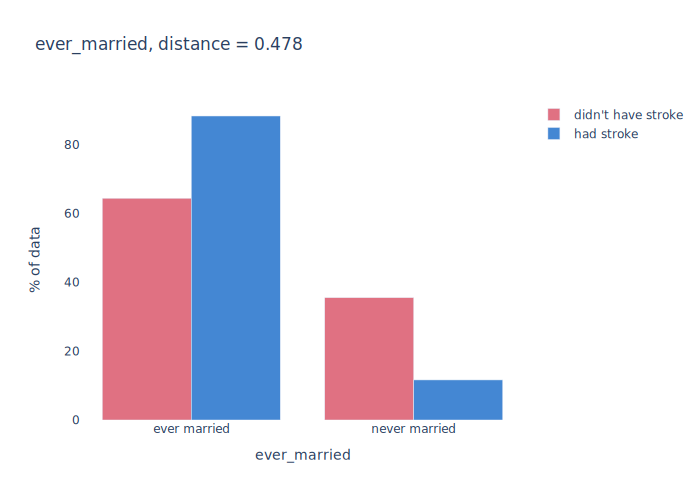

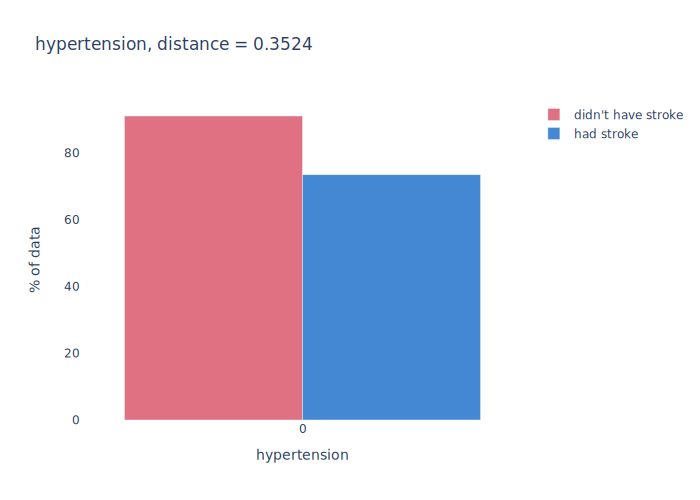

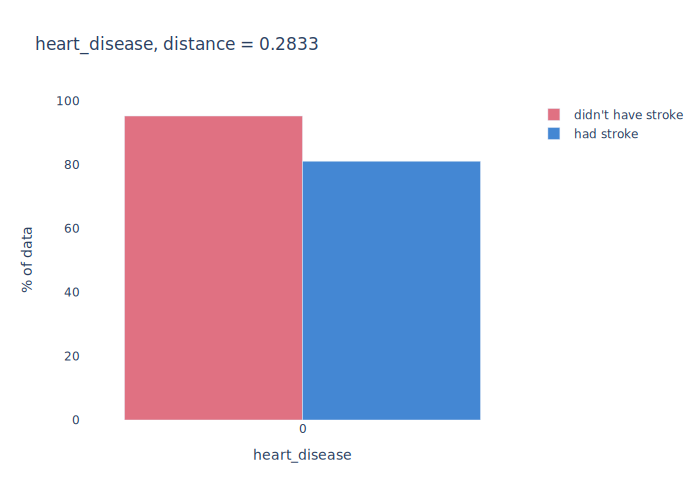

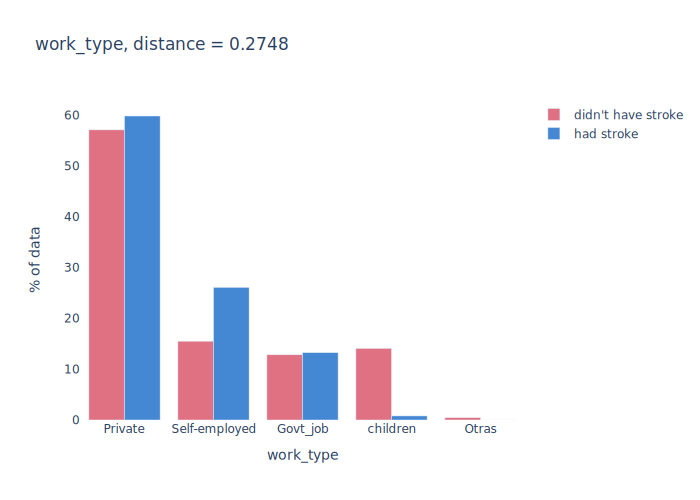

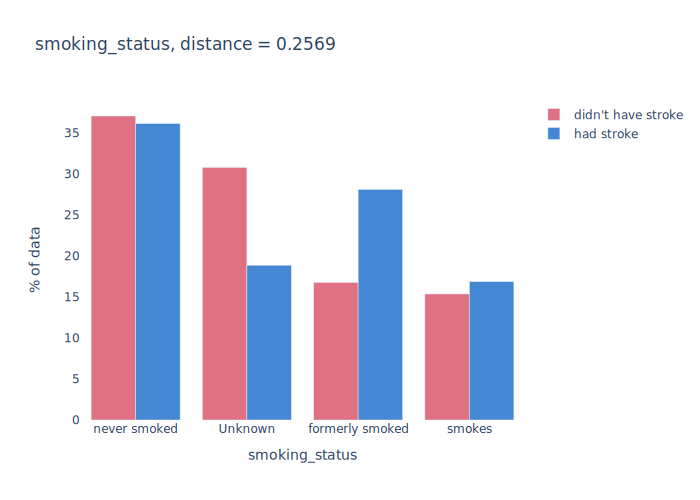

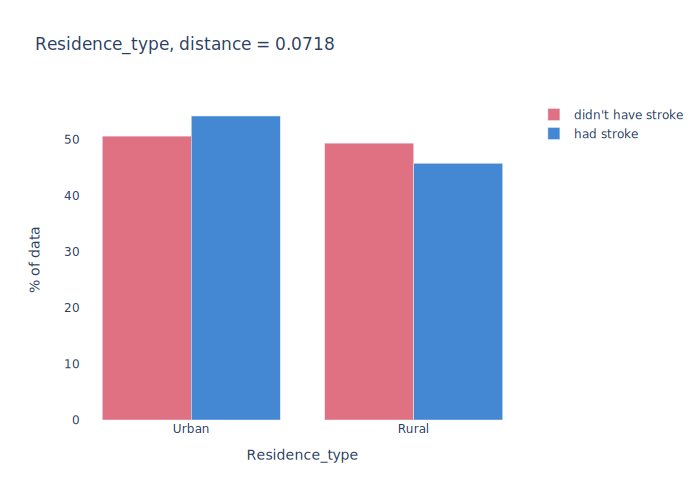

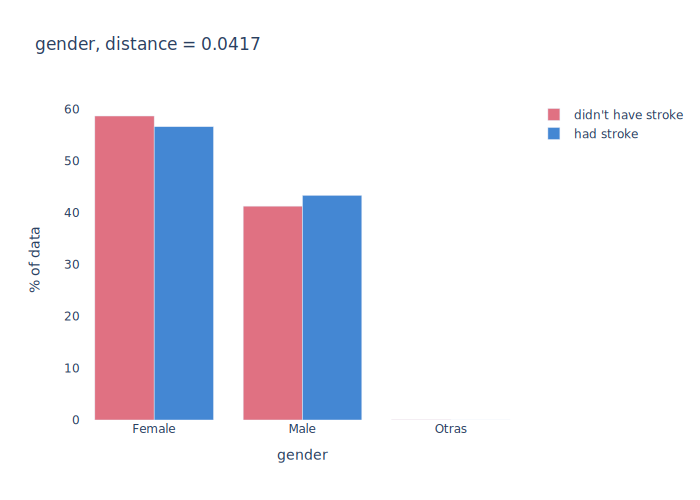

In [28]:
fig_dict, distances = compare_categorical_features(data, categorical_feats, groupby=target, categories_recall_pct=.9)
for feat, fig in fig_dict.items():
    fig.show()



In [29]:
round(distances, 2)

,distance
feature,
ever_married,0.48
hypertension,0.35
heart_disease,0.28
work_type,0.27
smoking_status,0.26
Residence_type,0.07
gender,0.04


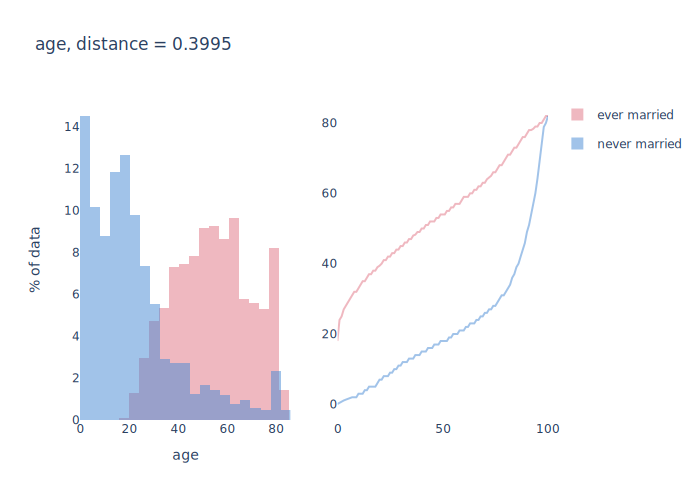

In [30]:
fig_dict, distances = compare_numerical_features(data, ['age'], groupby='ever_married', nbins=20, plot_inv_cdf=True)
for feat, fig in fig_dict.items():
    fig.show()



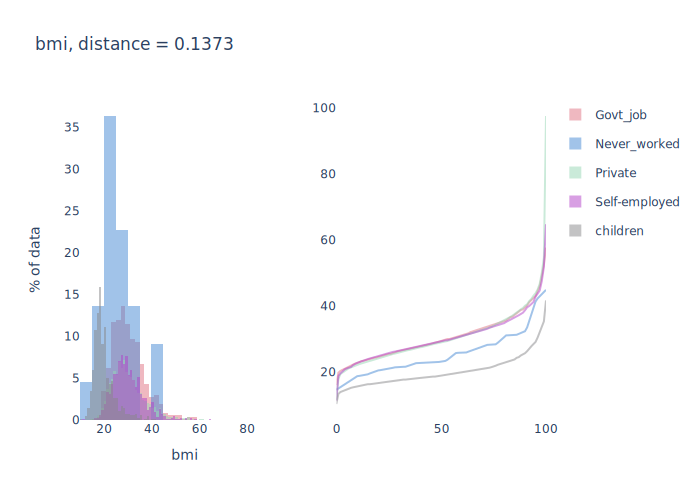

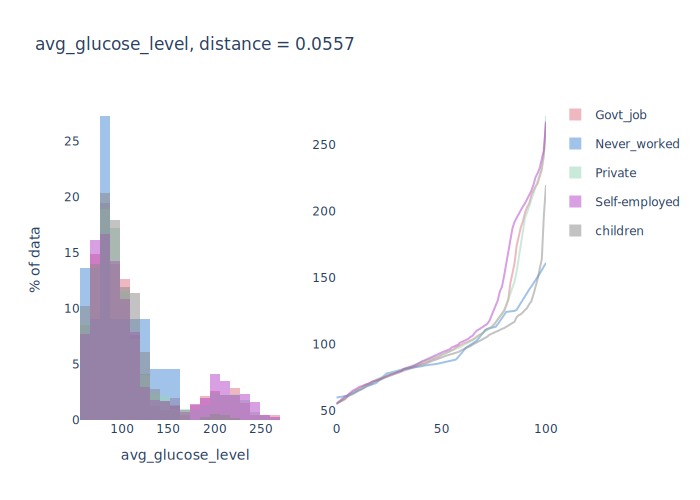

In [31]:
fig_dict, distances = compare_numerical_features(data, ['avg_glucose_level', 'bmi'], groupby='work_type', nbins=20, plot_inv_cdf=True)
for feat, fig in fig_dict.items():
    fig.show()

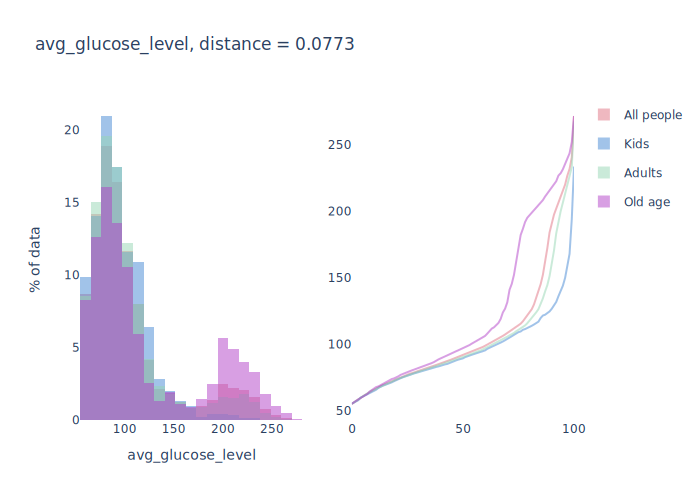

In [32]:
queries_dict = {
    'All people': 'age >= 0',
    'Kids'      : 'age <= 18',
    'Adults'    : '18 < age < 60',
    'Old age'   : '60 <= age',
}

fig_dict, distances = compare_numerical_features(data, ['avg_glucose_level'], queries_dict=queries_dict, nbins=20, plot_inv_cdf=True)
for feat, fig in fig_dict.items():
    fig.show()

In [33]:
categorical_feats

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

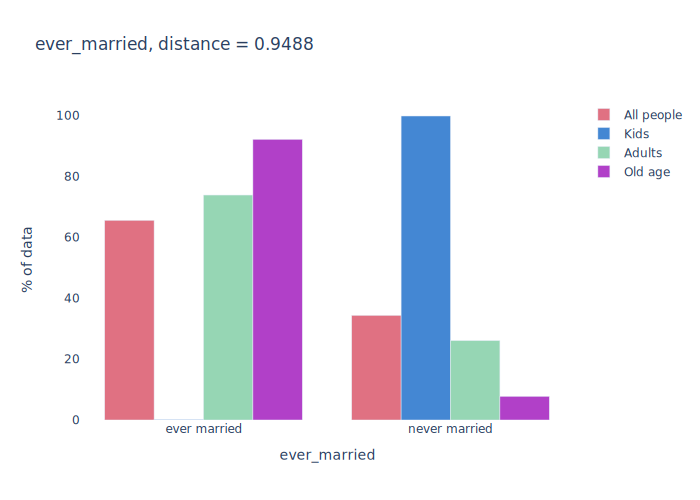

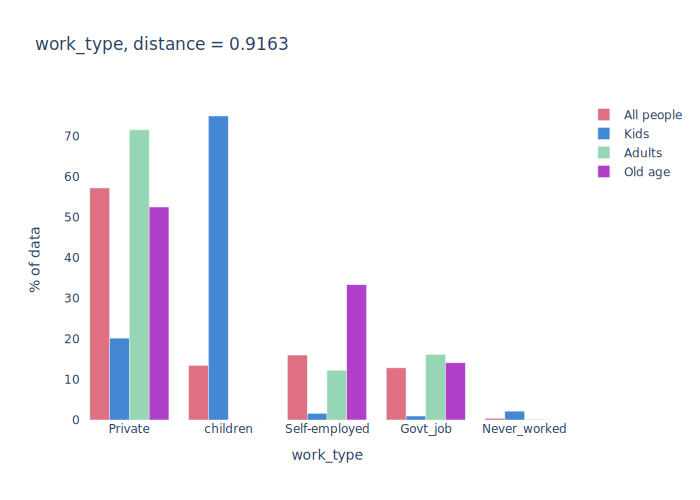

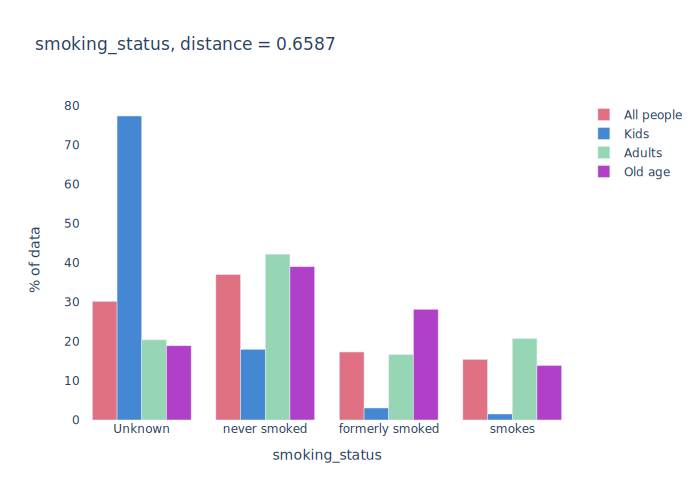

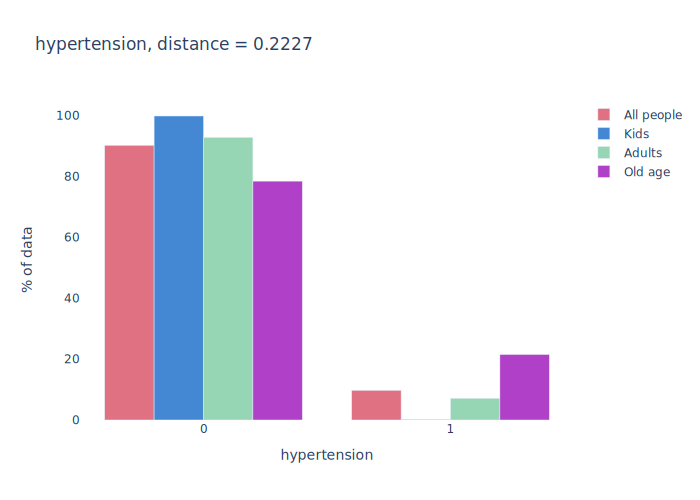

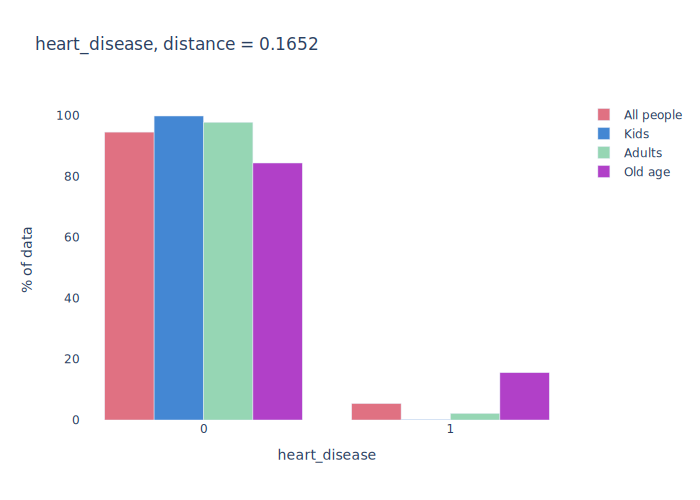

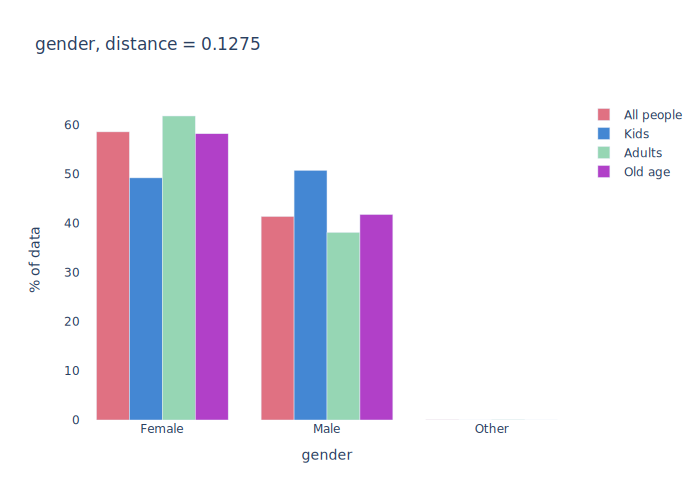

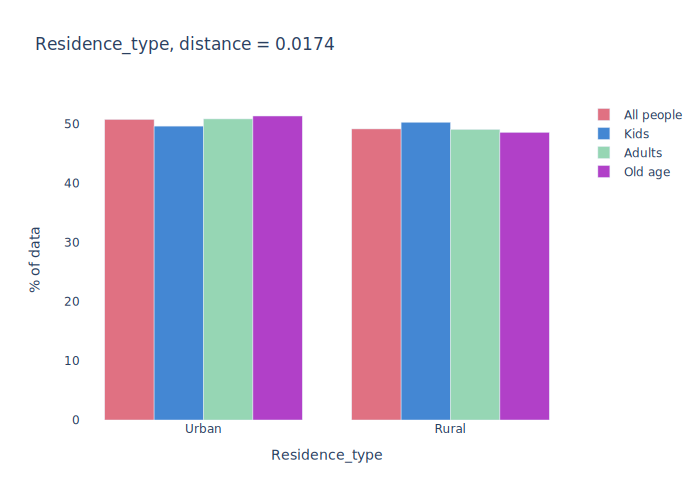

In [34]:
queries_dict = {
    'All people': 'age >= 0',
    'Kids': 'age <= 18',
    'Adults': '18 < age < 60',
    'Old age':'60 <= age',
}

fig_dict, distances = compare_categorical_features(data, categorical_feats, queries_dict=queries_dict)
for feat, fig in fig_dict.items():
    fig.show()

In [35]:
distances

,distance
feature,
ever_married,0.948817
work_type,0.916265
smoking_status,0.658703
hypertension,0.222734
heart_disease,0.165220
gender,0.127494
Residence_type,0.017366


# Marginal dependence plots

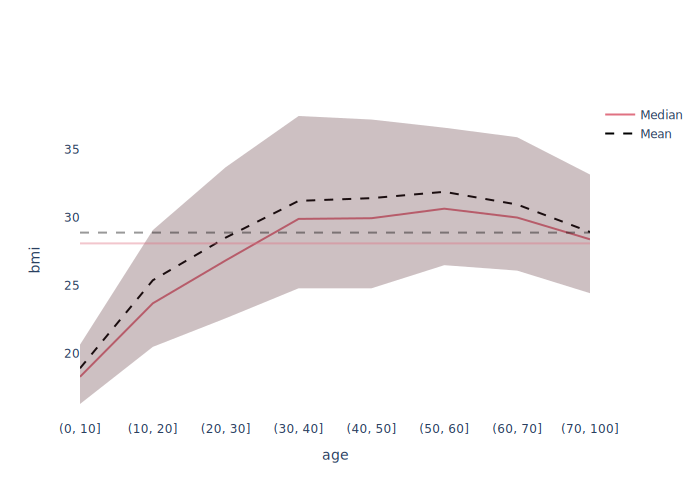

In [36]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
fig = marginal_dependency_plot(data, 'bmi', 'age', lower_q=0.2, upper_q=0.8, bins=bins)
fig.show()

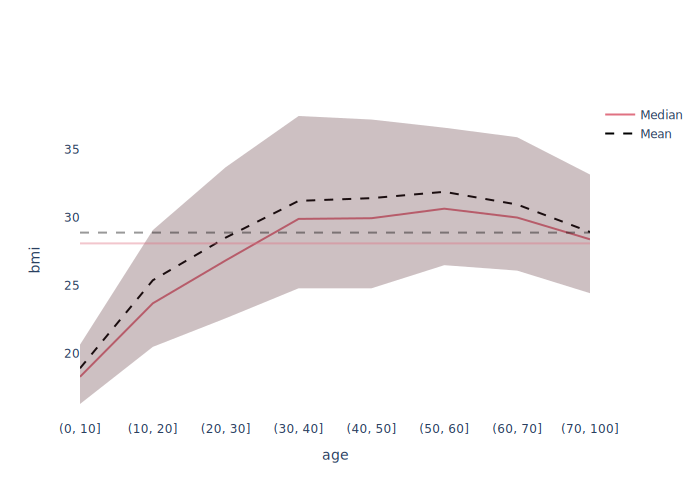

In [37]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
fig = marginal_dependency_plot(data, 'bmi', 'age', lower_q=0.2, upper_q=0.8, bins=bins)
fig.show()

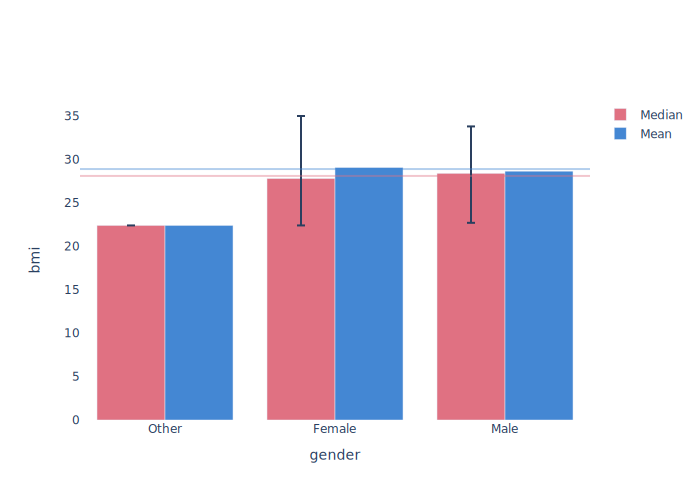

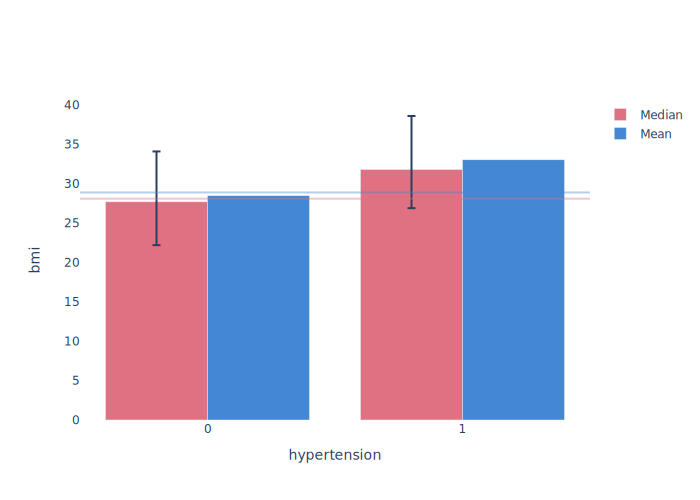

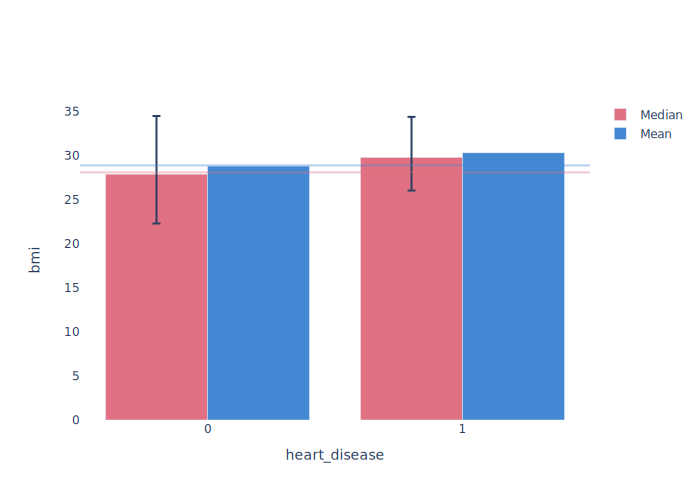

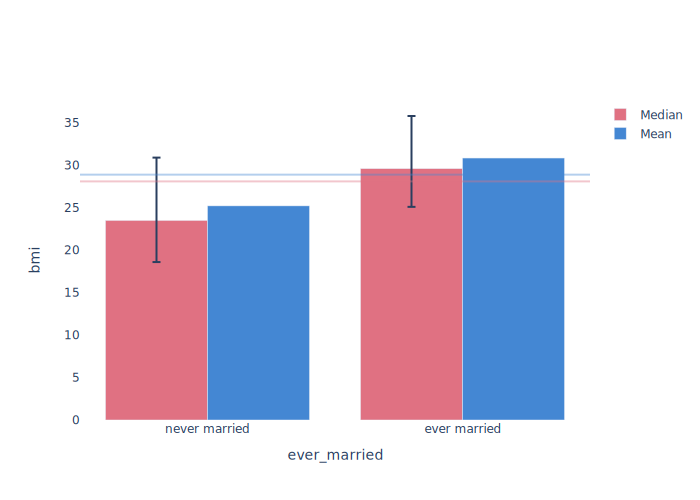

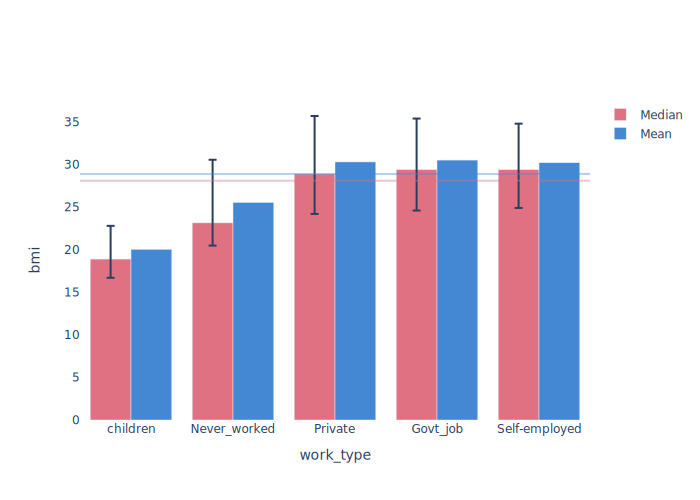

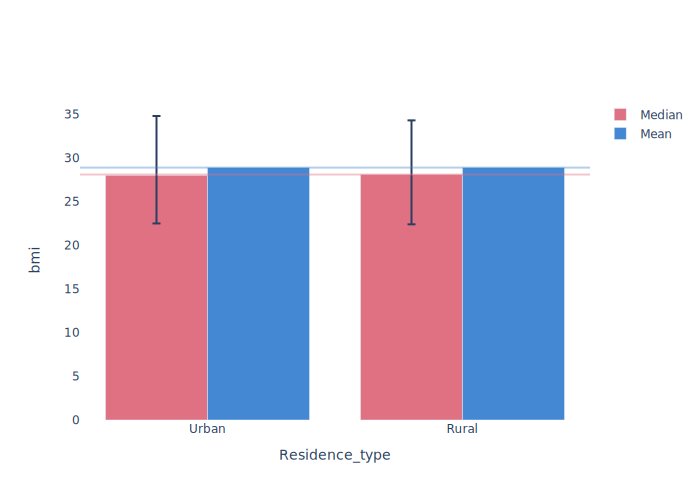

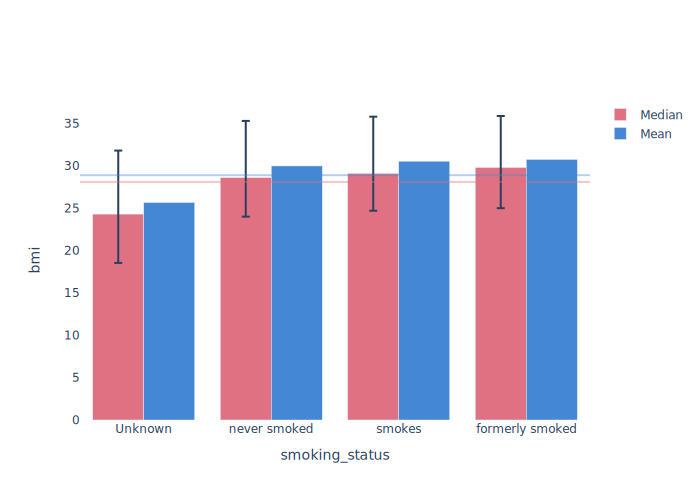

In [38]:
for cat_feat in categorical_feats:
    fig = marginal_dependency_plot(data, 'bmi', cat_feat, lower_q=0.2, upper_q=0.8, categorical_feature=True)
    fig.show()

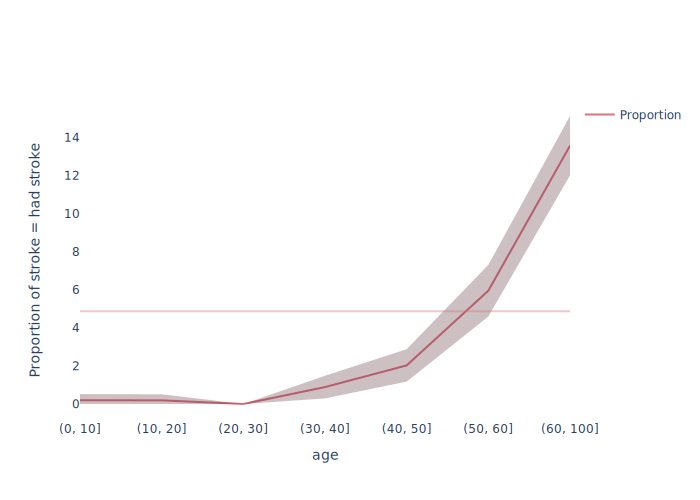

In [39]:
target_class = "had stroke"
alpha = 0.05

bins = [0, 10, 20, 30, 40, 50, 60, 100]
fig = marginal_dependency_plot(data, 'stroke', 'age', categorical_target_class=target_class, bins=bins)
fig.show()

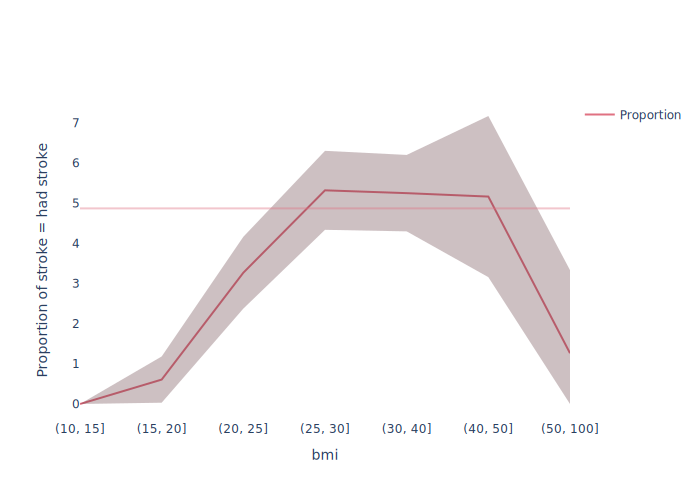

In [40]:
bins = [10, 15, 20, 25,  30, 40, 50, 100]
fig = marginal_dependency_plot(data, 'stroke', 'bmi', categorical_target_class=target_class, bins=bins)
fig.show()

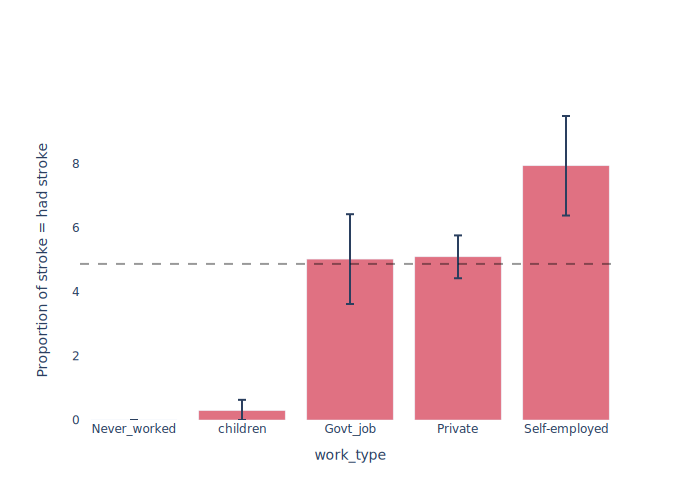

In [41]:
target_class = "had stroke"
alpha = 0.05

fig = marginal_dependency_plot(data, 'stroke', 'work_type', categorical_target_class=target_class, categorical_feature=True)
fig.show()